In [2]:
import pandas as pd

##  Load the dataset 🔃

In [3]:
data_path = 'D:\MAIM\StudentsPerformance.csv'
data = pd.read_csv(data_path)

## Inspect the data 🗜️

In [4]:
data.shape

(1000, 8)

In [5]:
data.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [6]:
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,female,group D,some college,free/reduced,none,77,86,86
209,female,group B,some college,free/reduced,none,58,61,66
583,female,group D,associate's degree,standard,completed,73,75,80
174,female,group C,bachelor's degree,free/reduced,completed,43,51,54
342,female,group B,high school,standard,completed,69,76,74


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Summary statistics
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Clean the dataset 🧹

In [ ]:
# Check for missing values
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
# One-hot encoding
data_encoded = pd.get_dummies(data, columns=[
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
])

## Apply normalization 🐜

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric score columns
scaler = MinMaxScaler()
data_encoded[['math score', 'reading score', 'writing score']] = scaler.fit_transform(
    data_encoded[['math score', 'reading score', 'writing score']]
)

data_encoded

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.72,0.662651,0.711111,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,0.69,0.879518,0.866667,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,0.90,0.939759,0.922222,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,0.47,0.481928,0.377778,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,0.76,0.734940,0.722222,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.88,0.987952,0.944444,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False
996,0.62,0.457831,0.500000,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True
997,0.59,0.650602,0.611111,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
998,0.68,0.734940,0.744444,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False


## Descriptive Statistics Report


📌 Statistics for: math score
Mean: 0.66089
Median: 0.66
Std Dev: 0.15163080096009438
Min: 0.0
Max: 1.0


c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


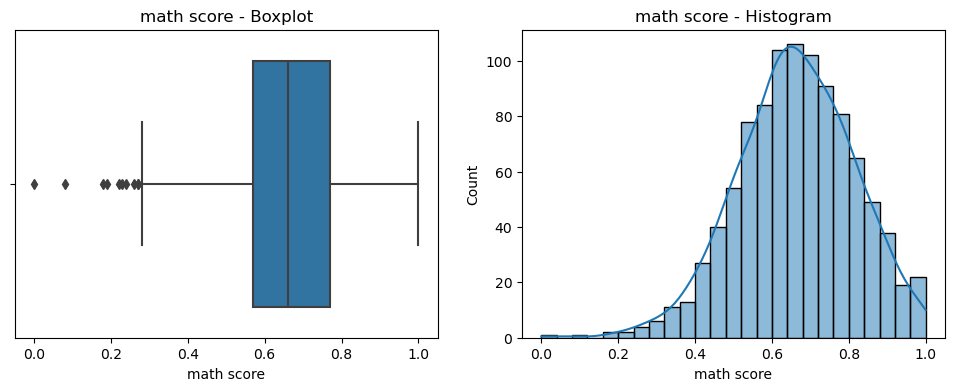


📌 Statistics for: reading score
Mean: 0.6285421686746988
Median: 0.6385542168674699
Std Dev: 0.17590592695484608
Min: 0.0
Max: 1.0


c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


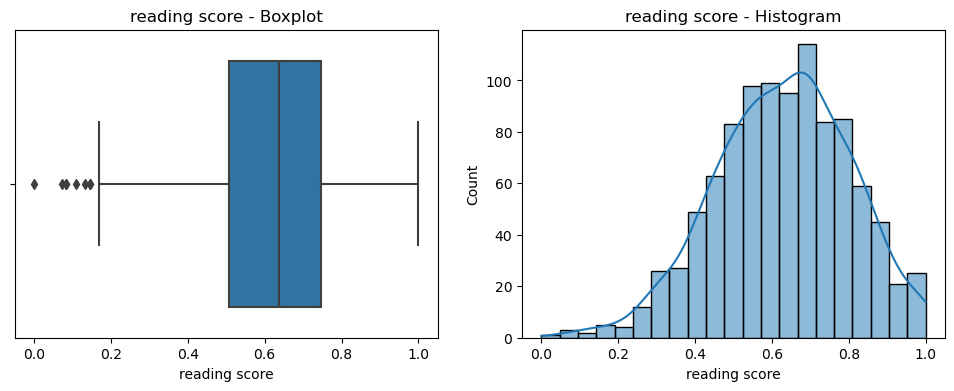


📌 Statistics for: writing score
Mean: 0.6450444444444445
Median: 0.6555555555555556
Std Dev: 0.16884063345410744
Min: 0.0
Max: 1.0


c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


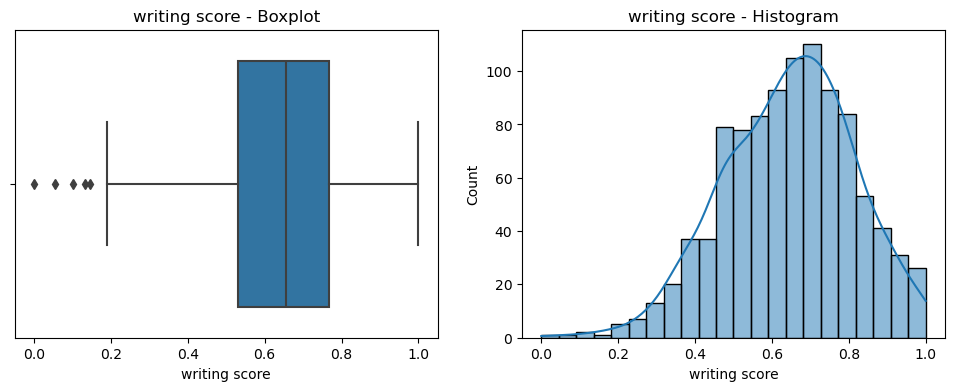

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to print statistics and plot
def describe_and_plot(col):
    print(f"\n📌 Statistics for: {col}")
    print("Mean:", data_encoded[col].mean())
    print("Median:", data_encoded[col].median())
    print("Std Dev:", data_encoded[col].std())
    print("Min:", data_encoded[col].min())
    print("Max:", data_encoded[col].max())

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(x=data_encoded[col], ax=axs[0])
    axs[0].set_title(f"{col} - Boxplot")

    sns.histplot(data_encoded[col], kde=True, ax=axs[1])
    axs[1].set_title(f"{col} - Histogram")

    plt.show()

# Apply to each score
for score_col in ['math score', 'reading score', 'writing score']:
    describe_and_plot(score_col)


##  Bonus Task 🌚

In [ ]:
# Denormalize for scoring (or calculate before normalization)
# Let's assume we reloaded the original dataset for this step
df_bonus = pd.read_csv("D:/MAIM/StudentsPerformance.csv")

# Create average_score column
df_bonus['average_score'] = df_bonus[['math score', 'reading score', 'writing score']].mean(axis=1)

# Categorize performance
def classify_performance(avg):
    if avg >= 80:
        return 'High'
    elif avg >= 60:
        return 'Medium'
    else:
        return 'Low'

df_bonus['performance_level'] = df_bonus['average_score'].apply(classify_performance)

# Preview
df_bonus[['average_score', 'performance_level']].head()


,average_score,performance_level
0,72.666667,Medium
1,82.333333,High
2,92.666667,High
3,49.333333,Low
4,76.333333,Medium


In [19]:
# Save encoded and normalized dataset
data_encoded.to_csv("students_cleaned.csv", index=False)

# Save bonus task with average_score
df_bonus.to_csv("students_with_performance.csv", index=False)


## 📌 Reflection



**What are the main insights you noticed from the score distributions?**
- Reading and writing scores tend to be slightly higher than math scores.
- The distributions are somewhat skewed depending on the subject.
- There is a visible cluster of students around the `60–80` range.

**Were there any surprising patterns or outliers?**
- Some students had very low scores in one or more subjects.
- Boxplots revealed a few low outliers in math and writing scores.

**How did normalization change the values?**
- Normalization scaled all score columns to a `[0, 1]` range.
- It preserved the shape and relative differences in the data but made it easier to compare across features on the same scale.

